In [1]:
import netCDF4 as nc

# Replace 'your_file.nc' with the path to your NetCDF file
file_path = 'CMIP6_IPSL_CM_2025_2054_Cleaned_Data_Simple/CM61-LR-scen-ssp245_20250101_20341231_1M_histmth_arctic_CLEANED.nc'

try:
    # Open the file in read mode ('r')
    with nc.Dataset(file_path, 'r') as ds:
        print(f"File Description: {ds.description}")
        print("\n--- Global Attributes ---")
        for attr in ds.ncattrs():
            print(f"  {attr}: {ds.getncattr(attr)}")

        print("\n--- Dimensions ---")
        for dim_name, dim in ds.dimensions.items():
            print(f"  {dim_name}: size={len(dim)}, unlimited={dim.isunlimited()}")

        print("\n--- Variables ---")
        for var_name, var in ds.variables.items():
            print(f"  {var_name}: shape={var.shape}, dtype={var.dtype}")

            # Example: Reading the actual data for a specific variable (e.g., 'temperature')
            if var_name == 'temperature':
                data = var[:]  # Read all data for the 'temperature' variable
                print(f"    Data loaded. Shape: {data.shape}")
                print(f"    First 5 values: {data.flatten()[:5]}")
                # You can also access attributes specific to this variable:
                # print(f"    Units: {var.units}")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

File Description: Created by xios

--- Global Attributes ---
  name: histmth
  description: Created by xios
  title: Created by xios
  Conventions: CF-1.6
  timeStamp: 2018-Dec-06 07:53:05 GMT
  uuid: ed30e218-6892-487a-90db-c6942fb038bf
  LongName: IPSLCM6.1.8-LR
  history: Fri Dec  7 02:43:11 2018: ncrcat -C --buffer_size 838860800 -p /ccc/scratch/cont003/gencmip6/lurtont/IGCM_OUT/IPSLCM6/PROD/ssp245/CM61-LR-scen-ssp245/ATM/Output/MO CM61-LR-scen-ssp245_20250101_20251231_1M_histmth.nc CM61-LR-scen-ssp245_20260101_20261231_1M_histmth.nc CM61-LR-scen-ssp245_20270101_20271231_1M_histmth.nc CM61-LR-scen-ssp245_20280101_20281231_1M_histmth.nc CM61-LR-scen-ssp245_20290101_20291231_1M_histmth.nc CM61-LR-scen-ssp245_20300101_20301231_1M_histmth.nc CM61-LR-scen-ssp245_20310101_20311231_1M_histmth.nc CM61-LR-scen-ssp245_20320101_20321231_1M_histmth.nc CM61-LR-scen-ssp245_20330101_20331231_1M_histmth.nc CM61-LR-scen-ssp245_20340101_20341231_1M_histmth.nc --output CM61-LR-scen-ssp245_20250101_20

<xarray.DataArray 'time' (time: 120)> Size: 960B
array(['2025-01-16T12:00:00.000000000', '2025-02-15T00:00:00.000000000',
       '2025-03-16T12:00:00.000000000', '2025-04-16T00:00:00.000000000',
       '2025-05-16T12:00:00.000000000', '2025-06-16T00:00:00.000000000',
       '2025-07-16T12:00:00.000000000', '2025-08-16T12:00:00.000000000',
       '2025-09-16T00:00:00.000000000', '2025-10-16T12:00:00.000000000',
       '2025-11-16T00:00:00.000000000', '2025-12-16T12:00:00.000000000',
       '2026-01-16T12:00:00.000000000', '2026-02-15T00:00:00.000000000',
       '2026-03-16T12:00:00.000000000', '2026-04-16T00:00:00.000000000',
       '2026-05-16T12:00:00.000000000', '2026-06-16T00:00:00.000000000',
       '2026-07-16T12:00:00.000000000', '2026-08-16T12:00:00.000000000',
       '2026-09-16T00:00:00.000000000', '2026-10-16T12:00:00.000000000',
       '2026-11-16T00:00:00.000000000', '2026-12-16T12:00:00.000000000',
       '2027-01-16T12:00:00.000000000', '2027-02-15T00:00:00.000000000',
  

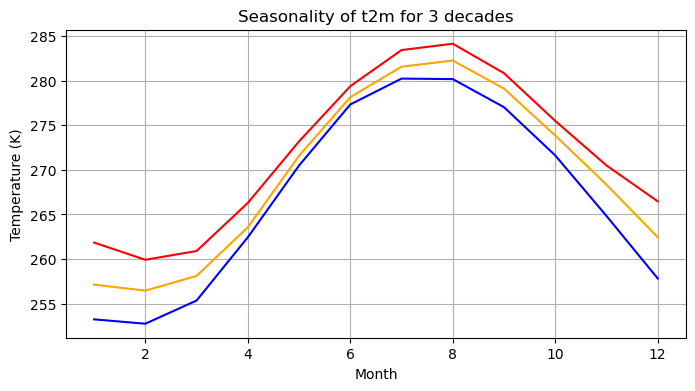

In [40]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# scenario ssp2-45

ssp2_1 = xr.open_dataset(r"data\arctic\ssp245\CM61-LR-scen-ssp245_20250101_20341231_1M_histmth_arctic_CLEANED.nc")
ssp2_2 = xr.open_dataset(r"data\arctic\ssp245\CM61-LR-scen-ssp245_20550101_20641231_1M_histmth_arctic_CLEANED.nc")
ssp2_3 = xr.open_dataset(r"data\arctic\ssp245\CM61-LR-scen-ssp245_20850101_20941231_1M_histmth_arctic_CLEANED.nc")


# FIX: apply rename + datetime conversion directly
def fix_time(ds):
    ds = ds.rename({'time_counter': 'time'})
    ds = ds.assign_coords(time=pd.to_datetime(ds['time'].values))
    return ds

ssp2_1 = fix_time(ssp2_1)
ssp2_2 = fix_time(ssp2_2)
ssp2_3 = fix_time(ssp2_3)

print(ssp2_1['time'])

# spatial mean
t1_mean = ssp2_1['t2m'].mean(dim=("lat", "lon"))
t2_mean = ssp2_2['t2m'].mean(dim=("lat", "lon"))
t3_mean = ssp2_3['t2m'].mean(dim=("lat", "lon"))


# Monthly climatology
monthly1 = t1_mean.groupby("time.month").mean("time")
monthly2 = t2_mean.groupby("time.month").mean("time")
monthly3 = t3_mean.groupby("time.month").mean("time")


# Plot
plt.figure(figsize=(8,4))
monthly1.plot(color='blue')
monthly2.plot(color='orange')
monthly3.plot(color='red')
plt.title("Seasonality of t2m for 3 decades")
plt.xlabel("Month")
plt.ylabel("Temperature (K)")
plt.grid(True)
plt.show()



Frozen({'t2m': <xarray.Variable (time_counter: 120, lat: 27, lon: 144)> Size: 2MB
[466560 values with dtype=float32]
Attributes:
    long_name:           Temperature 2m
    units:               K
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s), 'sicf': <xarray.Variable (time_counter: 120, lat: 27, lon: 144)> Size: 2MB
[466560 values with dtype=float32]
Attributes:
    long_name:           Sea-ice fraction
    units:               -
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s), 'lat': <xarray.IndexVariable 'lat' (lat: 27)> Size: 108B
array([90.      , 88.73239 , 87.46479 , 86.19718 , 84.92958 , 83.66197 ,
       82.39436 , 81.12676 , 79.85915 , 78.59155 , 77.323944, 76.056335,
       74.788734, 73.521126, 72.253525, 70.985916, 69.71831 , 68.45071 ,
       67.1831  , 65.91549 , 64.6

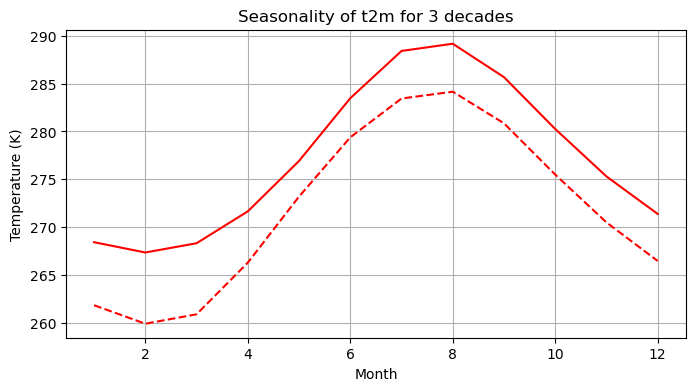

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# scenario ssp2-45

ssp5_1 = xr.open_dataset(r"data\arctic\ssp585\CM61-LR-scen-ssp585_20250101_20341231_1M_histmth_arctic_CLEANED.nc")
ssp5_2 = xr.open_dataset(r"data\arctic\ssp585\CM61-LR-scen-ssp585_20550101_20641231_1M_histmth_arctic_CLEANED.nc")
ssp5_3 = xr.open_dataset(r"data\arctic\ssp585\CM61-LR-scen-ssp585_20850101_20941231_1M_histmth_arctic_CLEANED.nc")

print(ssp5_1.variables)

# FIX: apply rename + datetime conversion directly
def fix_time(ds):
    ds = ds.rename({'time_counter': 'time'})
    ds = ds.assign_coords(time=pd.to_datetime(ds['time'].values))
    return ds

ssp5_1 = fix_time(ssp5_1)
ssp5_2 = fix_time(ssp5_2)
ssp5_3 = fix_time(ssp5_3)

# spatial mean
t1_mean5 = ssp5_1['t2m'].mean(dim=("lat", "lon"))
t2_mean5 = ssp5_2['t2m'].mean(dim=("lat", "lon"))
t3_mean5 = ssp5_3['t2m'].mean(dim=("lat", "lon"))


# Monthly climatology
monthly15 = t1_mean5.groupby("time.month").mean("time")
monthly25 = t2_mean5.groupby("time.month").mean("time")
monthly35 = t3_mean5.groupby("time.month").mean("time")


# Plot
plt.figure(figsize=(8,4))
# monthly15.plot(color='blue')
# monthly25.plot(color='orange')
monthly35.plot(color='red')
# monthly1.plot(color='blue', linestyle='--')
# monthly2.plot(color='orange',linestyle='--')
monthly3.plot(color='red',linestyle='--')
plt.title("Seasonality of t2m for 3 decades")
plt.xlabel("Month")
plt.ylabel("Temperature (K)")
plt.grid(True)
plt.show()



# # Plot
# plt.figure(figsize=(8,4))
# monthly1(marker="o")

# plt.title("Seasonality of t2m (2025–2035)")
# plt.xlabel("Month")
# plt.ylabel("Temperature (°C)")
# plt.grid(True)
# plt.show()

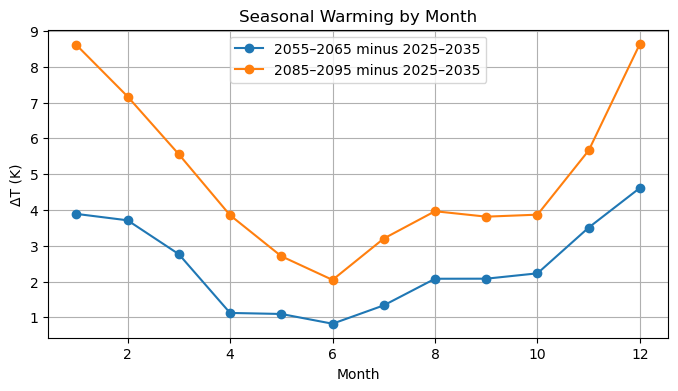

In [41]:
# analyse extreme events change
# --> warm days warm less than colder days

warming_1_2 = monthly2 - monthly1
warming_1_3 = monthly3 - monthly1

plt.figure(figsize=(8,4))
warming_1_2.plot(marker="o", label="2055–2065 minus 2025–2035")
warming_1_3.plot(marker="o", label="2085–2095 minus 2025–2035")

plt.title("Seasonal Warming by Month")
plt.xlabel("Month")
plt.ylabel("ΔT (K)")
plt.grid(True)
plt.legend()
plt.show()




In [44]:

def amplitude(monthly):
    return float(monthly.max() - monthly.min())

print("Amplitude 2025–35:", amplitude(monthly1))
print("Amplitude 2055–65:", amplitude(monthly2))
print("Amplitude 2085–95:", amplitude(monthly3))

# Define seasons
DJF = [12, 1, 2]
JJA = [6, 7, 8]

def seasonal_mean(monthly, season):
    return monthly.sel(month=season).mean()

for name, m in zip(["2025–35","2055–65","2085–95"], [monthly1, monthly2, monthly3]):
    print(name, "DJF =", float(seasonal_mean(m, DJF)))
    print(name, "JJA =", float(seasonal_mean(m, JJA)))


winter_warming = float(seasonal_mean(monthly3, DJF) - seasonal_mean(monthly1, DJF))
summer_warming = float(seasonal_mean(monthly3, JJA) - seasonal_mean(monthly1, JJA))

AA = winter_warming / summer_warming
print("Arctic Amplification index:", AA)



Amplitude 2025–35: 27.483551025390625
Amplitude 2055–65: 25.799072265625
Amplitude 2085–95: 24.227081298828125
2025–35 DJF = 254.6056671142578
2025–35 JJA = 279.2489318847656
2055–65 DJF = 258.67822265625
2055–65 JJA = 280.6615295410156
2085–95 DJF = 262.7457580566406
2085–95 JJA = 282.3198547363281
Arctic Amplification index: 2.6506986127121674


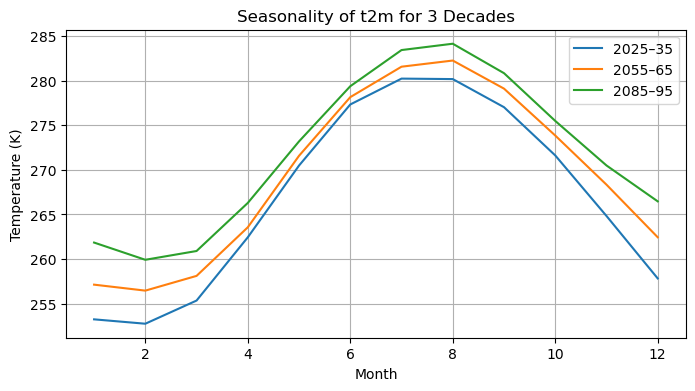

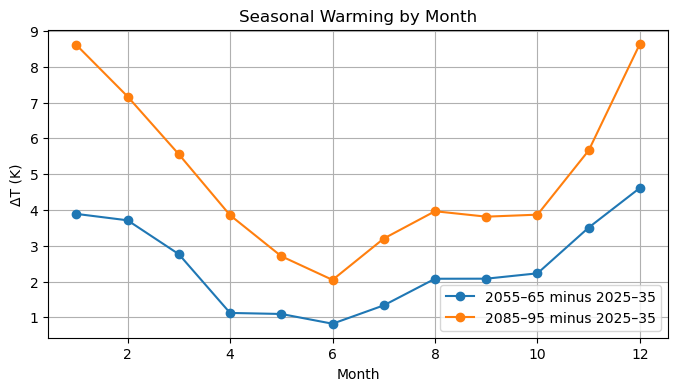

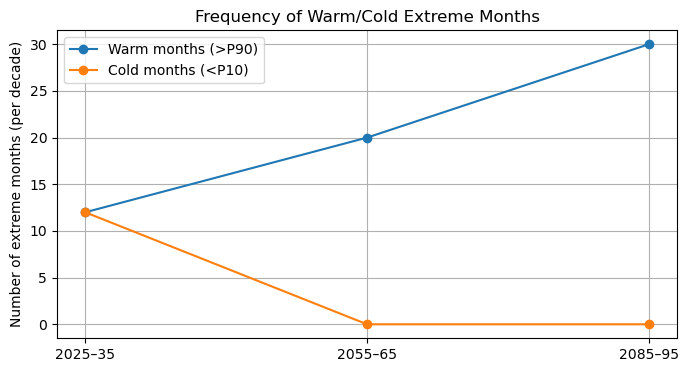

In [45]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# ==============================
# Load datasets
# ==============================
ssp2_1 = xr.open_dataset(r"data/arctic/ssp245/CM61-LR-scen-ssp245_20250101_20341231_1M_histmth_arctic_CLEANED.nc")
ssp2_2 = xr.open_dataset(r"data/arctic/ssp245/CM61-LR-scen-ssp245_20550101_20641231_1M_histmth_arctic_CLEANED.nc")
ssp2_3 = xr.open_dataset(r"data/arctic/ssp245/CM61-LR-scen-ssp245_20850101_20941231_1M_histmth_arctic_CLEANED.nc")

# ==============================
# Fix time variable
# ==============================
def fix_time(ds):
    ds = ds.rename({'time_counter': 'time'})
    ds = ds.assign_coords(time=pd.to_datetime(ds['time'].values))
    return ds

ssp2_1 = fix_time(ssp2_1)
ssp2_2 = fix_time(ssp2_2)
ssp2_3 = fix_time(ssp2_3)

# ==============================
# Spatial means
# ==============================
t1 = ssp2_1['t2m'].mean(dim=("lat", "lon"))
t2 = ssp2_2['t2m'].mean(dim=("lat", "lon"))
t3 = ssp2_3['t2m'].mean(dim=("lat", "lon"))

# ==============================
# Monthly climatology
# ==============================
monthly1 = t1.groupby("time.month").mean("time")
monthly2 = t2.groupby("time.month").mean("time")
monthly3 = t3.groupby("time.month").mean("time")

# ==============================
# Percentile thresholds for extreme months
# ==============================
P10 = t1.quantile(0.10, dim="time")
P90 = t1.quantile(0.90, dim="time")

def count_extreme_months(ts, P10, P90):
    warm = int((ts > P90).sum())
    cold = int((ts < P10).sum())
    return warm, cold

warm1, cold1 = count_extreme_months(t1, P10, P90)
warm2, cold2 = count_extreme_months(t2, P10, P90)
warm3, cold3 = count_extreme_months(t3, P10, P90)

# ==============================
# Plot: Seasonal cycle
# ==============================
plt.figure(figsize=(8,4))
monthly1.plot(label="2025–35")
monthly2.plot(label="2055–65")
monthly3.plot(label="2085–95")
plt.title("Seasonality of t2m for 3 Decades")
plt.xlabel("Month")
plt.ylabel("Temperature (K)")
plt.grid(True)
plt.legend()
plt.show()

# ==============================
# Plot: Warming by month
# ==============================
warming_1_2 = monthly2 - monthly1
warming_1_3 = monthly3 - monthly1

plt.figure(figsize=(8,4))
warming_1_2.plot(marker="o", label="2055–65 minus 2025–35")
warming_1_3.plot(marker="o", label="2085–95 minus 2025–35")
plt.title("Seasonal Warming by Month")
plt.xlabel("Month")
plt.ylabel("ΔT (K)")
plt.grid(True)
plt.legend()
plt.show()

# ==============================
# Plot: Extreme warm/cold months
# ==============================
decades = ["2025–35", "2055–65", "2085–95"]
warm_months = [warm1, warm2, warm3]
cold_months = [cold1, cold2, cold3]

plt.figure(figsize=(8,4))
plt.plot(decades, warm_months, marker="o", label="Warm months (>P90)")
plt.plot(decades, cold_months, marker="o", label="Cold months (<P10)")
plt.ylabel("Number of extreme months (per decade)")
plt.title("Frequency of Warm/Cold Extreme Months")
plt.grid(True)
plt.legend()
plt.show()
